In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, Lars
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, r2_score, confusion_matrix, classification_report, roc_curve
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", 50)
import os
import matplotlib.pyplot as plt
data_path = os.getcwd() + '/DATA/'

In [2]:
# Carga y visualización de datos originales
df_original = pd.read_csv(data_path + 'hotel_booking.csv')
df = df_original.copy()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [3]:
# visualización de la definición de variables

dict_df = pd.read_csv(data_path + 'diccionario_datos P2 hotel booking - features.csv')
dict_df = dict_df.drop(['description'], axis=1)
dict_df = dict(zip(dict_df['feature'], dict_df['Descripción']))
dict_df

{'hotel': 'Los conjuntos de datos contienen la información de reserva de dos hoteles. Uno de los hoteles es un hotel resort y el otro es un hotel urbano.',
 'is_canceled': 'Valor que indica si la reserva fue cancelada (1) o no (0).',
 'lead_time': 'Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.',
 'arrival_date_year': 'Año de la fecha de llegada',
 'arrival_date_month': 'Mes de la fecha de llegada con 12 categorías: "enero" a "diciembre"',
 'arrival_date_week_number': 'Número de semana de la fecha de llegada',
 'arrival_date_day_of_month': 'Día del mes de la fecha de llegada',
 'stays_in_weekend_nights': 'Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para alojarse en el hotel',
 'stays_in_week_nights': 'Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para alojarse en el hotel BO y BL / Calculado contando el número de noches de la semana',
 'adults': '

# Análisis exploratorio, ingeniería de variables y preprocesamiento

In [4]:
# Se eliminan variables insignificantes

df = df.drop(['credit_card', 'phone-number', 'name', 'email'], axis=1)

In [5]:
# Se eliminan los duplicados

df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.isnull().sum() / len(df)

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000046
babies                            0.000000
meal                              0.000000
country                           0.005172
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

# CHILDREN

In [9]:
df['children'].value_counts()/len(df['children'])

0.0     0.904252
1.0     0.053721
2.0     0.041112
3.0     0.000858
10.0    0.000011
Name: children, dtype: float64

In [10]:
# Se eliminan datos atìpicos y se recategoriza en dicotómica

df['children'] = df['children'].loc[df['children'] < 4]
df['children'] = df['children'].map(lambda x: 1 if x != 0 else x)
df['children'].value_counts()

0.0    79028
1.0     8368
Name: children, dtype: int64

# BABIES

In [11]:
df['babies'].value_counts()

0     86482
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

In [12]:
# Se eliminan datos atìpicos y se recategoriza en dicotómica

df['babies'] = df['babies'].loc[df['babies'] < 3]
df['babies'] = df['babies'].map(lambda x: 1 if x != 0 else x)
df['babies'].value_counts()

0.0    86482
1.0      914
Name: babies, dtype: int64

# COUNTRY

In [13]:
df['country'].value_counts()

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

In [14]:
# Se encuentra el dato atìpico CN = CHN

df_aux = df.copy()
df_aux['countrytype'] = df_aux['country'].map(lambda x: len(str(x)))
df_aux['country'].loc[df_aux['countrytype'] == 2].value_counts()

CN    1093
Name: country, dtype: int64

In [15]:
df['country'] = df['country'].map(lambda x: 'CHN' if x == 'CN' else x)

In [16]:
# Se utiliza un diccionario alterno para encontrar el nombre y la región del país de la reservación

country_data = pd.read_csv(data_path + 'hotel country.csv')
region = dict(zip(country_data['country'], country_data['region']))
country_name = dict(zip(country_data['country'], country_data['country name']))
df['country_name'] = df['country'].map(country_name)
df['country_region'] = df['country'].map(region)
(df['country_name'] + ' - ' + df['country_region']).value_counts()

Portugal - Southern Europe                                                27453
United Kingdom of Great Britain and Northern Ireland - Northern Europe    10433
France - Western Europe                                                    8837
Spain - Southern Europe                                                    7252
Germany - Western Europe                                                   5387
                                                                          ...  
Myanmar - South-eastern Asia                                                  1
San Marino - Southern Europe                                                  1
Burkina Faso - Western Africa                                                 1
Cayman Islands - Caribbean                                                    1
Cambodia - South-eastern Asia                                                 1
Length: 174, dtype: int64

In [17]:
# Se renombran las categorías a fin de mantener los países con mayor recurrencia 


country = dict(zip(country_data['country name'], country_data['region']))
country.update({'Portugal': 'Portugal', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland',
               'France': 'France', 'Spain': 'Spain', 'Germany': 'Germany'})
df['country_name'] = df['country_name'].map(country)
df['country_name'].isnull().sum() / len(df['country_name'])

#Se comparan los valores nulos del mapeo y de la variable original, no hay ningun dato distinto

0.005698201290676919

In [18]:
# Se mantienen las regiones donde se encuentran dichos países con mayor recurrencia como resto de "region"

df['country_region'] = (df['country_name'].map(lambda x: 'Rest of Southern Europe' if x == 'Southern Europe' else x)
                 .map(lambda x: 'Rest of Northern Europe' if x == 'Northern Europe' else x)
                 .map(lambda x: 'Rest of Western Europe' if x == 'Western Europe' else x)
                 .map(lambda x: 'Rest of Southern Europe' if x == 'Southern Europe' else x))
df['country_region'].value_counts()

Portugal                                                27453
United Kingdom of Great Britain and Northern Ireland    10433
France                                                   8837
Spain                                                    7252
Rest of Western Europe                                   6778
Rest of Northern Europe                                  5418
Germany                                                  5387
Rest of Southern Europe                                  3449
South America                                            2447
Eastern Europe                                           2324
Eastern Asia                                             2244
Northern America                                         1875
Western Asia                                              912
Australia and New Zealand                                 441
Northern Africa                                           391
Middle Africa                                             363
Southern

In [19]:
# Se muestran las regiones de tamaño más pequeño que la muestra/200 como "otra región"

df = df.drop(['country', 'country_name'], axis=1)
country_region = pd.DataFrame(df['country_region'].value_counts()).reset_index()
country_region = (country_region.loc[country_region['country_region'] > len(df)/200])['index'].to_list()
(df['country_region'].map(lambda x: 'Other region' if x not in country_region else x)).value_counts()

Portugal                                                27453
United Kingdom of Great Britain and Northern Ireland    10433
France                                                   8837
Spain                                                    7252
Rest of Western Europe                                   6778
Rest of Northern Europe                                  5418
Germany                                                  5387
Rest of Southern Europe                                  3449
South America                                            2447
Eastern Europe                                           2324
Eastern Asia                                             2244
Other region                                             2146
Northern America                                         1875
Western Asia                                              912
Australia and New Zealand                                 441
Name: country_region, dtype: int64

In [20]:
# Se crea una nueva caterogría para el resto del continente asiático, Oceanía y Zelandia, y otra para el resto de América

df['country_region'] = (df['country_region'].map(lambda x: 'Rest of Asia, Oceania & Zealand' if (x == 'Southern Asia' or x == 'South-eastern Asia' or x == 'Central Asia' or x == 'Australia and New Zealand' or x == 'Micronesia' or x == 'Melanesia' or x == 'Polynesia') else x)
                        .map(lambda x: 'Africa' if (x == 'Northern Africa' or x == 'Middle Africa' or x == 'Eastern Africa' or x == 'Western Africa' or x == 'Southern Africa') else x)
                        .map(lambda x: 'Central America & Caribbean' if (x == 'Central America' or x == 'Caribbean') else x))       
df['country_region'].value_counts()



Portugal                                                27453
United Kingdom of Great Britain and Northern Ireland    10433
France                                                   8837
Spain                                                    7252
Rest of Western Europe                                   6778
Rest of Northern Europe                                  5418
Germany                                                  5387
Rest of Southern Europe                                  3449
South America                                            2447
Eastern Europe                                           2324
Eastern Asia                                             2244
Northern America                                         1875
Africa                                                   1025
Western Asia                                              912
Rest of Asia, Oceania & Zealand                           905
Central America & Caribbean                               157
Antarcti

In [21]:
# Se eliminan los datos atìpicos (Antàrtida y América Central y Caribe)
df = df.loc[(df['country_region'] != 'Antarctica') & (df['country_region'] != 'Central America & Caribbean')]
df['country_region'].value_counts()

# 16 regiones finales

Portugal                                                27453
United Kingdom of Great Britain and Northern Ireland    10433
France                                                   8837
Spain                                                    7252
Rest of Western Europe                                   6778
Rest of Northern Europe                                  5418
Germany                                                  5387
Rest of Southern Europe                                  3449
South America                                            2447
Eastern Europe                                           2324
Eastern Asia                                             2244
Northern America                                         1875
Africa                                                   1025
Western Asia                                              912
Rest of Asia, Oceania & Zealand                           905
Name: country_region, dtype: int64

# Agent

In [22]:
# Se recategorizan las agencias a las que tengan más recurrencia que el tamaño de la muestra / 125
# Se envían las restantes a la categoría "otra agencia"

df['agent'] = df['agent'].fillna('No Agent')
agent = pd.DataFrame(df['agent'].value_counts()).reset_index()
agent = (agent.loc[agent['agent'] > len(df)/125])['index'].to_list()
df['agent'] = df['agent'].map(lambda x: 'Other Agent' if x not in agent else x)
df['agent'].value_counts()

# Categorías totales: 15

9.0            28686
Other Agent    14531
240.0          13020
No Agent       12173
14.0            3342
7.0             3291
250.0           2779
241.0           1638
28.0            1501
8.0             1379
1.0             1232
6.0             1115
40.0             985
314.0            844
242.0            721
Name: agent, dtype: int64

# Company

In [23]:
# Se imputan los datos atípicos como "sin compañía" de la variable Company.

df['company'] = df['company'].fillna(0)
df['company'] = df['company'].map(lambda x: 1 if x != 0.0 else x).astype(int)
df['company'].value_counts()
# Ahora es una variable dicotómica

0    81991
1     5246
Name: company, dtype: int64

# Adults

In [24]:
df['adults'].value_counts()

2     64393
1     16461
3      5923
0       384
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [25]:
df = df.loc[(df['adults'] < 5) & (df['adults'] >= 0)]
df['adults'] = df['adults'].map(lambda x: 3 if x == 4 else x)
df['adults'].value_counts()

# Se eliminan los datos atípicos para grupos extremadamente grandes de adultos por habitación
# Se asignan los pocos datos de 3 adultos a la categoría de 3 adultos

2    64393
1    16461
3     5983
0      384
Name: adults, dtype: int64

# Days_in_waiting_list

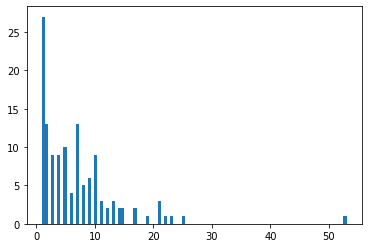

In [26]:
# Se grafica el comportamiento de los días en lista bajo al condición: En lista de espera
aux = df['days_in_waiting_list'].loc[df['days_in_waiting_list'] > 0].value_counts()
plot.hist(x=aux, bins=100)
plot.show()

# Se observan datos dispersos y no los suficientes por lo que

In [27]:
# Se recategoriza como variable dicotómica

df['days_in_waiting_list'] = df['days_in_waiting_list'].map(lambda x: 1 if x>0 else x)
df['days_in_waiting_list'].value_counts()

0    86363
1      858
Name: days_in_waiting_list, dtype: int64

# Previous_cancellations

In [28]:
#Se ve el comportamiento de la variable
df['previous_cancellations'].value_counts()

0     85536
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

# Previous booking not canceled

In [29]:
#Se ve el comportamiento de la variable

df['previous_bookings_not_canceled'].value_counts()

0     83682
1      1481
2       579
3       330
4       227
      ...  
47        1
49        1
50        1
51        1
72        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

# Canceling Difference

In [30]:
#Se crea una nueva variable continua: Radio de cancelación, derivado de la resta de las agendas previamente no canceladas
# menos las agendas previamente canceladas.
# Se intuye que la moda será 0 (los que son nuevos clientes), y se encuentra una gran cantidad de 1 y -1 (scoring dicotómico)

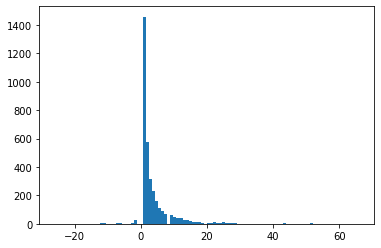

In [31]:
df['canceling_ratio'] = - df['previous_cancellations'] + df['previous_bookings_not_canceled']
plot.hist(x=df['canceling_ratio'].loc[(df['canceling_ratio'] != 0) & (df['canceling_ratio'] != -1)], bins=100)
plot.show()

In [32]:
# Se recategorizan las variables (los que tengan un scoring de màs de una cancelación vs agendas no canceladas:
# menor que -1; y visceversa)
df['canceling_ratio'] = df['canceling_ratio'].map(lambda x: 'menor que -1' if x<-1 else 'mayor que 1' if x>1 else x)
df['canceling_ratio'].value_counts()

0               82689
mayor que 1      1980
1                1458
-1               1035
menor que -1       59
Name: canceling_ratio, dtype: int64

In [33]:
# Se eliminan las variables que dejaron de ser útiles sobre las cancelaciones
df = df.drop(['previous_bookings_not_canceled', 'previous_cancellations'], axis=1)


# Car_parking

In [34]:
df['required_car_parking_spaces'].value_counts()

0    79911
1     7277
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [35]:
# Se eliminan datos atípicos y se recategoriza
df = df.loc[(df['required_car_parking_spaces'] < 3)]
df['required_car_parking_spaces'].value_counts()

0    79911
1     7277
2       28
Name: required_car_parking_spaces, dtype: int64

# Special Requests

In [36]:
df['total_of_special_requests'].value_counts()

0    43789
1    28969
2    11789
3     2313
4      320
5       36
Name: total_of_special_requests, dtype: int64

In [37]:
# Se recategorizan a 3 o más los requerimientos especiales por aprte del usuario para 3, 4 y 5
df['total_of_special_requests'] = df['total_of_special_requests'].map(lambda x: '3 or more' if x > 2 else x)
df['total_of_special_requests'].value_counts()

0            43789
1            28969
2            11789
3 or more     2669
Name: total_of_special_requests, dtype: int64

In [38]:
# Se revisan los nulos a imputar
df.isnull().sum() / len(df)

hotel                          0.00000
is_canceled                    0.00000
lead_time                      0.00000
arrival_date_year              0.00000
arrival_date_month             0.00000
arrival_date_week_number       0.00000
arrival_date_day_of_month      0.00000
stays_in_weekend_nights        0.00000
stays_in_week_nights           0.00000
adults                         0.00000
children                       0.00000
babies                         0.00000
meal                           0.00000
market_segment                 0.00000
distribution_channel           0.00000
is_repeated_guest              0.00000
reserved_room_type             0.00000
assigned_room_type             0.00000
booking_changes                0.00000
deposit_type                   0.00000
agent                          0.00000
company                        0.00000
days_in_waiting_list           0.00000
customer_type                  0.00000
adr                            0.00000
required_car_parking_spac

# Market Segment

In [39]:
df['market_segment'].value_counts()

Online TA        51507
Offline TA/TO    13870
Direct           11774
Groups            4932
Corporate         4202
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [40]:
# Se eliminan los datos atípicos 
df = df.loc[df['market_segment'] != 'Undefined']
df['market_segment'].value_counts()

Online TA        51507
Offline TA/TO    13870
Direct           11774
Groups            4932
Corporate         4202
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

# Booking Changes

In [41]:
df['booking_changes'].value_counts()

0     71353
1     10871
2      3501
3       872
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: booking_changes, dtype: int64

In [42]:
# Se eliminan los datos atípicos y se recategorizan desde 4 cambios de agenda a infinito
df = df.loc[df['booking_changes'] < 15]
df['booking_changes'] = df['booking_changes'].map(lambda x:'4 or more' if x>3 else x)
df['booking_changes'].value_counts()

0            71353
1            10871
2             3501
3              872
4 or more      607
Name: booking_changes, dtype: int64

# arrival date month

In [43]:

df['arrival_date_month'].value_counts()

August       11239
July         10042
May           8324
April         7897
June          7749
March         7497
October       6912
September     6671
February      6092
December      5118
November      4984
January       4679
Name: arrival_date_month, dtype: int64

In [44]:
# Se mapea a fin de tener los meses en nùmero y no en palabra
month = {
    'August': 8,
    'July': 7,
    'May': 5,
    'October': 10,
    'April': 4,
    'June': 6,
    'September': 9,
    'March': 3,
    'February': 2,
    'November': 11,
    'December': 12,
    'January': 1
}
df['arrival_date_month'] = df['arrival_date_month'].map(month)


# Reservation status date

In [45]:
df['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 87204, dtype: object

In [46]:
# Se divide la fecha de estado de reservación en sus 3 respectivos conjuntos.

df['reservation_status_year'] = df['reservation_status_date'].map(lambda x: x.split('-',2)[0])
df['reservation_status_month'] = df['reservation_status_date'].map(lambda x: x.split('-',2)[1]).astype(int)
df['reservation_status_day'] = df['reservation_status_date'].map(lambda x: x.split('-',2)[2]).astype(int)

In [47]:
df = df.drop('reservation_status_date', axis=1)

# reserved room type

In [48]:
df['reserved_room_type'].value_counts()

A    56416
D    17366
E     6035
F     2821
G     2048
B      995
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

In [49]:
# Se eliminan datos atípicos
df = df.loc[(df['reserved_room_type'] != 'L') & (df['reserved_room_type'] != 'P')]
df['reserved_room_type'].value_counts()

A    56416
D    17366
E     6035
F     2821
G     2048
B      995
C      915
H      596
Name: reserved_room_type, dtype: int64

# Assigned room type

In [50]:
df['assigned_room_type'].value_counts()

A    46193
D    22394
E     7178
F     3623
G     2494
C     2163
B     1813
H      705
I      355
K      274
Name: assigned_room_type, dtype: int64

# Distribution Channel

In [51]:
df['distribution_channel'].value_counts()

TA/TO        68990
Direct       12952
Corporate     5066
GDS            181
Undefined        3
Name: distribution_channel, dtype: int64

In [52]:
# Se eliminan datos atípicos

df = df.loc[df['distribution_channel'] != 'Undefined']
df['distribution_channel'].value_counts()

TA/TO        68990
Direct       12952
Corporate     5066
GDS            181
Name: distribution_channel, dtype: int64

# Stays in week nights

In [53]:
df['stays_in_week_nights'].value_counts()

1     22132
2     20703
3     16226
5      9640
4      7862
0      6145
6      1379
10      970
7       965
8       613
9       218
15       68
11       49
12       40
20       40
13       27
14       25
19       21
21       15
16       13
22        7
25        6
18        6
30        5
17        4
24        2
40        2
42        1
50        1
32        1
26        1
34        1
41        1
Name: stays_in_week_nights, dtype: int64

In [54]:
# Se recategoriza desde 11 o màs noches
df['stays_in_week_nights'] = df['stays_in_week_nights'].map(lambda x: '11 or more' if x>10 else x)
df['stays_in_week_nights'].value_counts()

1             22132
2             20703
3             16226
5              9640
4              7862
0              6145
6              1379
10              970
7               965
8               613
11 or more      336
9               218
Name: stays_in_week_nights, dtype: int64

# stays in weekend nights

In [55]:
df['stays_in_weekend_nights'].value_counts()

0     35060
2     26362
1     22600
4      1732
3      1148
6       113
5        70
8        60
7        15
9         9
10        7
12        5
16        3
13        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

In [56]:
# Se recategoriza desde 5 o más noches de fin de semana
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].map(lambda x: '5 or more' if x>4 else x)
df['stays_in_weekend_nights'].value_counts()

0            35060
2            26362
1            22600
4             1732
3             1148
5 or more      287
Name: stays_in_weekend_nights, dtype: int64

# lead time

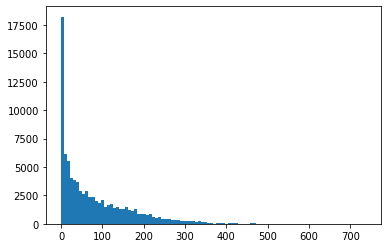

In [57]:
# Se grafica el comportamiento de la variable
df['lead_time'].value_counts()
plot.hist(x=df['lead_time'], bins=100)
plot.show()

In [58]:
# Se define la función para IQR
def iqr_(df, column, alpha = 1.5):
    
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    ub = q3 + (alpha*iqr)
    lb = q1 - (alpha*iqr)
    
    aux = df.loc[(df[column]<=ub) & (df[column]>=lb)].copy()
    
    return(aux)

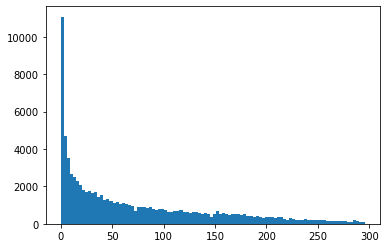

In [59]:
# Se filtra la vairbale continua pues se notaron datos atípicos en la cola de la distribución, a través del IQR

df = iqr_(df,'lead_time')
plot.hist(x=df['lead_time'], bins=100)
plot.show()

# adr

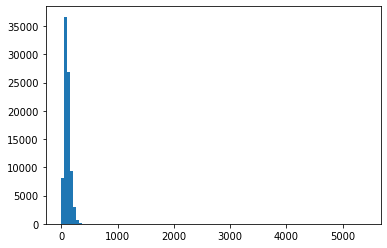

In [60]:
# Se explora el comportamiento de la diostribución de adr
plot.hist(x=df['adr'], bins=100)
plot.show()

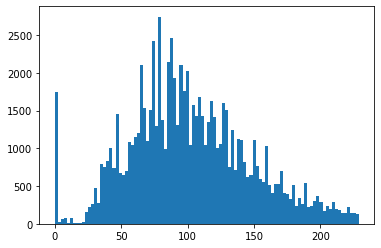

In [61]:
# y se le aplica IQR
df['adr'] = df['adr'].loc[df['adr']>=0]
df = iqr_(df,'adr')
plot.hist(x=df['adr'], bins=100)
plot.show()

# La distribucón ya causa más sentido, así mismo se eliminaron datos negativos

In [62]:
# Se instancian las variables discretas

disc = ['hotel', 'is_canceled', 'arrival_date_year', 'adults', 'children', 
        'babies', 'meal', 'country_region', 'market_segment','distribution_channel', 'is_repeated_guest',
        'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company',
        'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status',
       'reservation_status_year', 'stays_in_week_nights', 'stays_in_weekend_nights', 'arrival_date_month',
       'canceling_ratio', 'days_in_waiting_list']

In [63]:
# Y se revisan sus categorías
for col in disc:
    display(df[col].value_counts(True).reset_index())

,index,hotel
0,City Hotel,0.622795
1,Resort Hotel,0.377205


,index,is_canceled
0,0,0.733372
1,1,0.266628


,index,arrival_date_year
0,2016,0.492488
1,2017,0.350104
2,2015,0.157408


,index,adults
0,2,0.736489
1,1,0.193968
2,3,0.065141
3,0,0.004402


,index,children
0,0.0,0.915554
1,1.0,0.084446


,index,babies
0,0.0,0.989838
1,1.0,0.010162


,index,meal
0,BB,0.783647
1,SC,0.113136
2,HB,0.094220
3,Undefined,0.005481
4,FB,0.003517


,index,country_region
0,Portugal,0.315137
1,United Kingdom of Great Britain and Northern I...,0.116984
2,France,0.104456
3,Spain,0.082499
4,Rest of Western Europe,0.079547
5,Germany,0.062749
6,Rest of Northern Europe,0.062335
7,Rest of Southern Europe,0.040633
8,South America,0.028728
9,Eastern Europe,0.026947


,index,market_segment
0,Online TA,0.593340
1,Offline TA/TO,0.159397
2,Direct,0.134236
3,Groups,0.051039
4,Corporate,0.050784
5,Complementary,0.008452
6,Aviation,0.002753


,index,distribution_channel
0,TA/TO,0.790450
1,Direct,0.147429
2,Corporate,0.059927
3,GDS,0.002195


,index,is_repeated_guest
0,0,0.959402
1,1,0.040598


,index,reserved_room_type
0,A,0.659646
1,D,0.202469
2,E,0.066899
3,F,0.028375
4,G,0.017316
5,B,0.011386
6,C,0.008925
7,H,0.004984


,index,assigned_room_type
0,A,0.538628
1,D,0.262808
2,E,0.080505
3,F,0.037882
4,C,0.023306
5,G,0.022360
6,B,0.020930
7,H,0.006221
8,I,0.004099
9,K,0.003262


,index,booking_changes
0,0,0.823481
1,1,0.121188
2,2,0.039107
3,3,0.009458
4,4 or more,0.006766


,index,deposit_type
0,No Deposit,0.989644
1,Non Refund,0.009192
2,Refundable,0.001164


,index,agent
0,9.0,0.337759
1,Other Agent,0.166733
2,No Agent,0.142033
3,240.0,0.141390
4,7.0,0.039276
5,14.0,0.038427
6,250.0,0.029830
7,241.0,0.019062
8,28.0,0.018116
9,8.0,0.015630


,index,company
0,0,0.938145
1,1,0.061855


,index,customer_type
0,Transient,0.829083
1,Transient-Party,0.129434
2,Contract,0.035384
3,Group,0.006099


,index,required_car_parking_spaces
0,0,0.917106
1,1,0.082603
2,2,0.000291


,index,total_of_special_requests
0,0,0.502019
1,1,0.334206
2,2,0.134260
3,3 or more,0.029515


,index,reservation_status
0,Check-Out,0.733372
1,Canceled,0.254647
2,No-Show,0.011981


,index,reservation_status_year
0,2016,0.508664
1,2017,0.332800
2,2015,0.158463
3,2014,0.000073


,index,stays_in_week_nights
0,1,0.258794
1,2,0.239587
2,3,0.185808
3,5,0.106212
4,4,0.088350
5,0,0.072744
6,6,0.015109
7,7,0.010416
8,10,0.010089
9,8,0.006560


,index,stays_in_weekend_nights
0,0,0.405302
1,2,0.298641
2,1,0.262299
3,4,0.018177
4,3,0.012223
5,5 or more,0.003359


,index,arrival_date_month
0,8,0.116034
1,7,0.110626
2,5,0.095675
3,4,0.094098
4,3,0.089903
5,6,0.087987
6,10,0.079935
7,9,0.075776
8,2,0.073314
9,12,0.060521


,index,canceling_ratio
0,0,0.947288
1,mayor que 1,0.023779
2,1,0.017110
3,-1,0.011120
4,menor que -1,0.000703


,index,days_in_waiting_list
0,0,0.991063
1,1,0.008937


In [64]:
# Se isntancian las variables continuas
cont = [x for x in (set(df.columns) - set(disc))]

In [65]:
cont

['lead_time',
 'reservation_status_day',
 'reservation_status_month',
 'arrival_date_day_of_month',
 'arrival_date_week_number',
 'adr']

# Imputación de valores Country_Region

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82467 entries, 2 to 119389
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        82467 non-null  object 
 1   is_canceled                  82467 non-null  int64  
 2   lead_time                    82467 non-null  int64  
 3   arrival_date_year            82467 non-null  int64  
 4   arrival_date_month           82467 non-null  int64  
 5   arrival_date_week_number     82467 non-null  int64  
 6   arrival_date_day_of_month    82467 non-null  int64  
 7   stays_in_weekend_nights      82467 non-null  object 
 8   stays_in_week_nights         82467 non-null  object 
 9   adults                       82467 non-null  int64  
 10  children                     82467 non-null  float64
 11  babies                       82467 non-null  float64
 12  meal                         82467 non-null  object 
 13  market_segment 

In [67]:
# Se propone hacer imputación por medio de regresión logística a los datos nuños, por temas de tiempo
# se omite la división de imputación por test y entrenamiento pero se entiende el error cometido
target = 'country_region'
X0 = df.drop(columns=list(set(disc) - {target}))[list(set(cont).union({target}))].join(pd.get_dummies(df[list(set(disc) - {target})], drop_first = True))
X0.columns

Index(['lead_time', 'reservation_status_day', 'arrival_date_week_number',
       'reservation_status_month', 'country_region',
       'arrival_date_day_of_month', 'adr', 'babies', 'arrival_date_month',
       'required_car_parking_spaces', 'adults', 'children',
       'days_in_waiting_list', 'company', 'is_canceled', 'is_repeated_guest',
       'arrival_date_year', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'reservation_status_Check-Out', 'reservation_status_No-Show',
       'reservation_status_year_2015', 'reservation_status_year_2016',
       'reservation_status_year_2017', 'stays_in_week_nights_1',
       'stays_in_week_nights_2', 'stays_in_week_nights_3',
       'stays_in_week_nights_4', 'stays_in_week_nights_5',
       'stays_in_week_nights_6', 'stays_in_week_nights_7',
       'stays_in_week_nights_8', 'stays_in_week_nights_9',
       'stays_in_week_nights_10', 'stays_in_week_nights_11 or more',
       'canceling_ratio_0'

In [68]:
X0.columns.to_list()

['lead_time',
 'reservation_status_day',
 'arrival_date_week_number',
 'reservation_status_month',
 'country_region',
 'arrival_date_day_of_month',
 'adr',
 'babies',
 'arrival_date_month',
 'required_car_parking_spaces',
 'adults',
 'children',
 'days_in_waiting_list',
 'company',
 'is_canceled',
 'is_repeated_guest',
 'arrival_date_year',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'reservation_status_Check-Out',
 'reservation_status_No-Show',
 'reservation_status_year_2015',
 'reservation_status_year_2016',
 'reservation_status_year_2017',
 'stays_in_week_nights_1',
 'stays_in_week_nights_2',
 'stays_in_week_nights_3',
 'stays_in_week_nights_4',
 'stays_in_week_nights_5',
 'stays_in_week_nights_6',
 'stays_in_week_nights_7',
 'stays_in_week_nights_8',
 'stays_in_week_nights_9',
 'stays_in_week_nights_10',
 'stays_in_week_nights_11 or more',
 'canceling_ratio_0',
 'canceling_ratio_1',
 'canceling_ratio_mayor que 1',
 'canceling_ratio_m

In [69]:
# Se eliminan variables continuas de las variables predictoras

target = 'country_region'
y = df['country_region']
X = X0.drop(columns = cont)
X_train = X.loc[X['country_region'].isnull() == False].drop('country_region', axis = 1)
X_test = X.loc[X['country_region'].isnull() == True].drop('country_region', axis = 1)
y_train = X['country_region'].loc[X['country_region'].isnull() == False]
pred = X['country_region'].loc[X['country_region'].isnull() == True]

In [117]:
# Se crea la regresión
logistic=LogisticRegression(solver='liblinear',penalty='l1')
logistic.fit(X_train,y_train)
y_test = logistic.predict(X_test)

In [71]:
pd.DataFrame(y_test).value_counts()

Portugal                                                449
France                                                   21
United Kingdom of Great Britain and Northern Ireland     12
Spain                                                     4
Rest of Northern Europe                                   2
Germany                                                   1
Rest of Western Europe                                    1
dtype: int64

In [72]:
logistic.predict_proba(X_test)
logistic.predict_proba(X_test)[:,1]

array([0.0084305 , 0.00737662, 0.00288605, 0.00903365, 0.00755512,
       0.02881773, 0.00698419, 0.00060737, 0.00133687, 0.01731509,
       0.02017127, 0.00140432, 0.00515955, 0.00578061, 0.01410065,
       0.0073949 , 0.00617674, 0.00495809, 0.00339321, 0.01242647,
       0.00529233, 0.00344121, 0.00118295, 0.01442738, 0.00205864,
       0.00520401, 0.00205832, 0.0171753 , 0.00317749, 0.00337532,
       0.00305925, 0.0066146 , 0.00525044, 0.00888072, 0.03214865,
       0.00211009, 0.00102575, 0.00115236, 0.00122797, 0.01760506,
       0.00837687, 0.00579407, 0.00309054, 0.00254541, 0.00377927,
       0.00351308, 0.00216452, 0.00199675, 0.00320565, 0.01975992,
       0.00369701, 0.0080136 , 0.0019449 , 0.00097566, 0.00093648,
       0.00112593, 0.00123635, 0.0159594 , 0.04009784, 0.00509677,
       0.00130472, 0.00926368, 0.00154946, 0.00076571, 0.00212146,
       0.00265319, 0.00200534, 0.00570504, 0.01930803, 0.00597893,
       0.00750382, 0.00364291, 0.00168314, 0.01498512, 0.01183

In [73]:
# Se imputan las predicciones en el dataset

pred_dict = dict(zip(pred.index, y_test))
df['country_region'] = df['country_region'].fillna(value = pred_dict)

In [74]:
# Se revisan los datos nulos y se tienen 0 en todo el dataset
df.isnull().sum() / len(df)

hotel                          0.0
is_canceled                    0.0
lead_time                      0.0
arrival_date_year              0.0
arrival_date_month             0.0
arrival_date_week_number       0.0
arrival_date_day_of_month      0.0
stays_in_weekend_nights        0.0
stays_in_week_nights           0.0
adults                         0.0
children                       0.0
babies                         0.0
meal                           0.0
market_segment                 0.0
distribution_channel           0.0
is_repeated_guest              0.0
reserved_room_type             0.0
assigned_room_type             0.0
booking_changes                0.0
deposit_type                   0.0
agent                          0.0
company                        0.0
days_in_waiting_list           0.0
customer_type                  0.0
adr                            0.0
required_car_parking_spaces    0.0
total_of_special_requests      0.0
reservation_status             0.0
country_region      

# Woe IV para disminuir dimensiones

In [75]:
# ya que el modelo que se desea crear es muy básico, se debenm escoger las columnas con demasiado cuidado
disc

['hotel',
 'is_canceled',
 'arrival_date_year',
 'adults',
 'children',
 'babies',
 'meal',
 'country_region',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_year',
 'stays_in_week_nights',
 'stays_in_weekend_nights',
 'arrival_date_month',
 'canceling_ratio',
 'days_in_waiting_list']

In [76]:
# definimos las variables discretas ya categorizadas con dummies
woe = df.drop(columns=disc)[cont].join(pd.get_dummies(df[disc]))
woe = woe.drop(columns = cont)
woe.columns

Index(['is_canceled', 'arrival_date_year', 'adults', 'children', 'babies',
       'is_repeated_guest', 'company', 'required_car_parking_spaces',
       'arrival_date_month', 'days_in_waiting_list',
       ...
       'stays_in_weekend_nights_1', 'stays_in_weekend_nights_2',
       'stays_in_weekend_nights_3', 'stays_in_weekend_nights_4',
       'stays_in_weekend_nights_5 or more', 'canceling_ratio_-1',
       'canceling_ratio_0', 'canceling_ratio_1', 'canceling_ratio_mayor que 1',
       'canceling_ratio_menor que -1'],
      dtype='object', length=122)

In [77]:
# Se define la variable que nos permite intepretar el woe a aprtir del IV

def iv_woe(data, target, bins=20, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [78]:
# Se aplica la función
is_canceled_woe = iv_woe(woe, 'is_canceled', bins=15, show_woe=False)

Information value of arrival_date_year is 0.036744
Information value of adults is 0.046923
Information value of children is 0.011566
Information value of babies is 0.002018
Information value of is_repeated_guest is 0.061902
Information value of company is 0.056062
Information value of required_car_parking_spaces is 0.972701
Information value of arrival_date_month is 0.031761
Information value of days_in_waiting_list is 0.001466
Information value of hotel_City Hotel is 0.03277
Information value of hotel_Resort Hotel is 0.03277
Information value of meal_BB is 0.008946
Information value of meal_FB is 1e-06
Information value of meal_HB is 0.000392
Information value of meal_SC is 0.021685
Information value of meal_Undefined is 0.002156
Information value of country_region_Africa is 0.007164
Information value of country_region_Eastern Asia is 0.001878
Information value of country_region_Eastern Europe is 2e-06
Information value of country_region_France is 0.018278
Information value of country

In [81]:
# Se seleccionan las variables de mayor relevancia (en general las que la suma de sus IV categorizadas arroje màs de 0.1)
# Se eliminan variables sobrepredictivas (por ejemplo el status de la reservación: Cancelada)
disc_woe = ['is_canceled', 'market_segment', 'distribution_channel',
         'deposit_type', 'agent',
       'customer_type', 'total_of_special_requests',
       'canceling_ratio', 'country_region', 'assigned_room_type']
cont_woe = ['reservation_status_month',
 'arrival_date_week_number',
 'lead_time',
 'adr']
df_is_canceled = df[disc_woe + cont_woe]

In [115]:
df_is_canceled.shape

(82467, 14)

[CV 2/3] END ..alpha=624, solver=sag, tol=1e-07;, score=0.819 total time=   1.0s
[CV 2/3] END ..alpha=727, solver=sag, tol=1e-05;, score=0.818 total time=   0.6s
[CV 2/3] END ..alpha=285, solver=sag, tol=1e-07;, score=0.821 total time=   1.5s
[CV 1/3] END .alpha=824, solver=saga, tol=1e-07;, score=0.819 total time=   2.0s
[CV 2/3] END ..alpha=839, solver=svd, tol=1e-07;, score=0.818 total time=   0.5s
[CV 1/3] END .alpha=437, solver=lsqr, tol=1e-05;, score=0.822 total time=   0.2s
[CV 2/3] END .alpha=437, solver=lsqr, tol=1e-05;, score=0.820 total time=   0.2s
[CV 3/3] END .alpha=437, solver=lsqr, tol=1e-05;, score=0.813 total time=   0.2s
[CV 3/3] END ...alpha=925, solver=svd, tol=0.01;, score=0.810 total time=   0.7s
[CV 1/3] END alpha=568, solver=sparse_cg, tol=0.01;, score=0.821 total time=   0.1s
[CV 2/3] END alpha=568, solver=sparse_cg, tol=0.01;, score=0.819 total time=   0.1s
[CV 3/3] END alpha=568, solver=sparse_cg, tol=0.01;, score=0.811 total time=   0.1s
[CV 1/3] END ..alph

# MODELADO 

In [86]:
#Se Crean las dummies de las variables seleccionadas con la disminución de dimensiones

tgt = "is_canceled"
from sklearn.model_selection import train_test_split
df_is_canceled_dummied = df_is_canceled.drop(columns=disc_woe)[cont_woe].join(pd.get_dummies(df_is_canceled[disc_woe], drop_first = True))

X = df_is_canceled_dummied.drop(columns = tgt)
y = df_is_canceled_dummied[tgt]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Y se crea una muestra test del 30% de la muestra completa

In [87]:
# Se revisa la proporción de la variable a imputar
y_train.value_counts()

0    48415
1    17558
Name: is_canceled, dtype: int64

In [88]:
X_train.columns

Index(['reservation_status_month', 'arrival_date_week_number', 'lead_time',
       'adr', 'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'agent_6.0', 'agent_7.0', 'agent_8.0',
       'agent_9.0', 'agent_14.0', 'agent_28.0', 'agent_40.0', 'agent_240.0',
       'agent_241.0', 'agent_242.0', 'agent_250.0', 'agent_314.0',
       'agent_No Agent', 'agent_Other Agent', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'total_of_special_requests_1', 'total_of_special_requests_2',
       'total_of_special_requests_3 or more', 'canceling_ratio_0',
       'canceling_ratio_1', 'canceling_ratio_mayor que 1',
       'canceling_ratio_menor que -1', 'country_

# parámetros

In [89]:
# para mayor velocidad se reparametrizan las variables predictoras
mms_x = MinMaxScaler()
mms_y = MinMaxScaler()
Xs = mms_x.fit_transform(X_train)

In [203]:
#Se hace la regresión logística
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

/home/saintyx/Documentos/DIPLOMADO/MOD1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [194]:
logistic.predict(mms_x.fit_transform(X_test)).sum()

2927

In [205]:
logistic.predict_proba(X_test)
logistic.predict_proba(X_test)[:,1]

array([0.07913283, 0.4816008 , 0.28259937, ..., 0.02238369, 0.2300293 ,
       0.41005581])

In [206]:
# Se califica la regresión con Rocc y Acc
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [209]:
metricas(logistic,X_train,y_train)

 Roc Validate: 0.810
 Acc Validate: 0.786
 Matrix Conf Validate:  
 [[43897  4518]
 [ 9569  7989]]


In [210]:
metricas(logistic,X_test,y_test)

 Roc Validate: 0.981
 Acc Validate: 0.956
 Matrix Conf Validate:  
 [[13073   495]
 [  238  2688]]


/home/saintyx/Documentos/DIPLOMADO/MOD1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/saintyx/Documentos/DIPLOMADO/MOD1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul